In [618]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import os
import glob
import csv

In [619]:
# create glob string for each file
sep_20_flat = '/home/user/170920/flat*_x000.fits'
sep_18_flat = '/home/user/170918/flat*_x000.fits'
sep_20_bias = '/home/user/170920/bias*_x000.fits'
sep_18_bias = '/home/user/170918/bias*_x000.fits'

# create array of paths for each flat and bias!
images_20_flat = glob.glob(sep_20_flat)
images_20_bias = glob.glob(sep_20_bias)
images_18_flat = glob.glob(sep_18_flat)
images_18_bias = glob.glob(sep_18_bias)

# Process each image. First create master bias frame. 
# Add rejection!
bias_array_20 = []
for image in images_20_bias:
    hdu_list = fits.open(image)
    bias_array_20.append(hdu_list[0].data[800:820,950:970]) # try a few regions and sizes and find lowest sigma!!!
master_bias_20 = np.mean(bias_array_20, axis=0)

# Process each image. First create master bias frame.
bias_array_18 = []
for image in images_18_bias:
    hdu_list = fits.open(image)
    bias_array_18.append(hdu_list[0].data[800:820,950:970])
master_bias_18 = np.mean(bias_array_18, axis=0)

# Combine and take mean of the signal of bias corrected image
exposure_20 = []
mean_20 = []
noise_20 = []

for image in images_20_flat:
    hdu_list = fits.open(image)
    prihdr = hdu_list[0].header
    exposure_20.append(prihdr['EXPOSURE'])
    mean_20.append(np.mean((hdu_list[0].data[800:820,950:970]-master_bias_20).flatten()))
    noise_20.append(np.std((hdu_list[0].data[800:820,950:970]-master_bias_20).flatten()))

# Combine and take mean of the signal of bias corrected image
exposure_18 = []
mean_18 = []
noise_18 = []

for image in images_18_flat:
    hdu_list = fits.open(image)
    prihdr = hdu_list[0].header
    exposure_18.append(prihdr['EXPOSURE'])
    mean_18.append(np.mean((hdu_list[0].data[800:820,950:970]-master_bias_18).flatten()))
    noise_18.append(np.std((hdu_list[0].data[800:820,950:970]-master_bias_18).flatten()))

df_18 = pd.DataFrame({"exposure_18":exposure_18,"mean_18":mean_18,"noise_18":noise_18})
df_20 = pd.DataFrame({"exposure_20":exposure_20,"mean_20":mean_20,"noise_20":noise_20})
    
#    -master_bias_18, -master_bias_18
exp_times = []

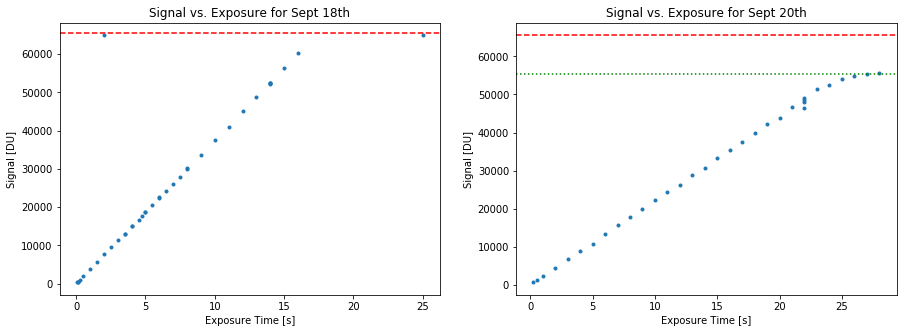

In [581]:
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(exposure_18, mean_18, '.')
axarr[0].set_title('Signal vs. Exposure for Sept 18th')
axarr[0].set_xlabel('Exposure Time [s]')
axarr[0].set_ylabel('Signal [DU]')
axarr[0].axhline(y=65535., color='r', linestyle='--')
axarr[1].plot(exposure_20, mean_20, '.')
axarr[1].set_title('Signal vs. Exposure for Sept 20th')
axarr[1].set_xlabel('Exposure Time [s]')
axarr[1].set_ylabel('Signal [DU]')
axarr[1].axhline(y=55500., color='g', linestyle=':')
axarr[1].axhline(y=65535., color='r', linestyle='--')
f.savefig('Exposures')

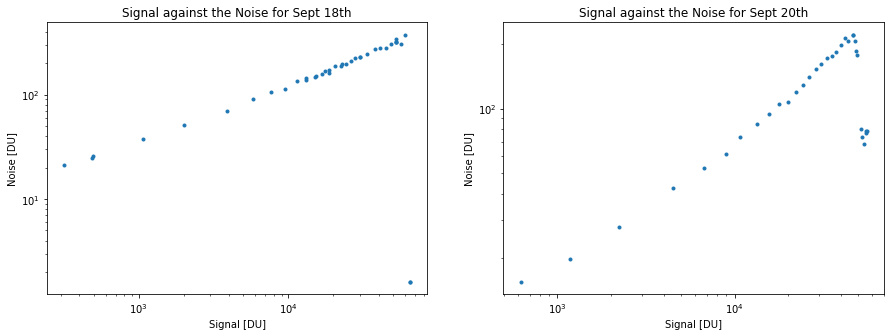

In [582]:
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].loglog(mean_18, noise_18, '.')
axarr[0].set_title('Signal against the Noise for Sept 18th')
axarr[0].set_xlabel('Signal [DU]')
axarr[0].set_ylabel('Noise [DU]')
axarr[1].loglog(mean_20, noise_20, '.')
axarr[1].set_title('Signal against the Noise for Sept 20th')
axarr[1].set_xlabel('Signal [DU]')
axarr[1].set_ylabel('Noise [DU]')
f.savefig('noise_signal')

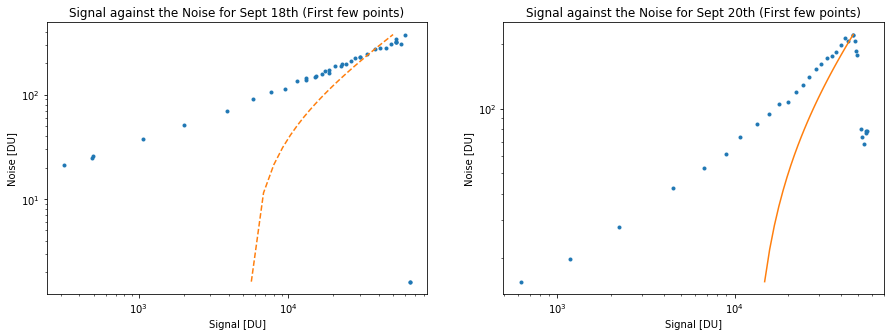

In [583]:
p_18 = np.polyfit(noise_18, mean_18, 1)
x_18 = np.linspace(np.min(noise_18), np.max(noise_18), len(noise_18))

p_20 = np.polyfit(noise_20, mean_20, 1)
x_20 = np.linspace(np.min(noise_20), np.max(noise_20), len(noise_20))

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].loglog(mean_18, noise_18, '.')
axarr[0].loglog(p_18[0]*x_18+p_18[1], x_18, '--')
axarr[0].set_title('Signal against the Noise for Sept 18th (First few points)')
axarr[0].set_xlabel('Signal [DU]')
axarr[0].set_ylabel('Noise [DU]')
axarr[1].loglog(mean_20, noise_20, '.')
axarr[1].loglog(p_20[0]*x_20+p_20[1], x_20, '-')
axarr[1].set_title('Signal against the Noise for Sept 20th (First few points)')
axarr[1].set_xlabel('Signal [DU]')
axarr[1].set_ylabel('Noise [DU]')

n_r 0.807018757462 -0.0931163708945
gain 1.23912857137
n_r 0.0272477583131 -1.56466922155
gain 36.7002668077


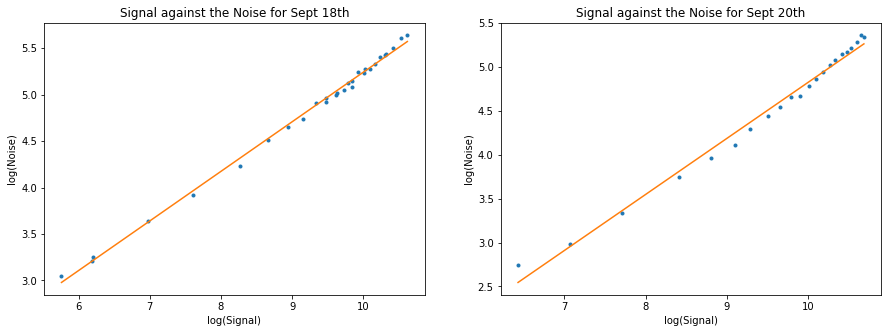

In [609]:
df_18=df_18.loc[(df_18['mean_18']<14.5**4.)] #& (df_18['noise_18'] < 30.)]
df_20=df_20.loc[(df_20['mean_20']<14.5**4.)] #& (df_20['noise_20'] < 30.)]

exposure_18, mean_18, noise_18 = df_18['exposure_18'].values, df_18['mean_18'].values, df_18['noise_18'].values
exposure_20, mean_20, noise_20 = df_20['exposure_20'].values, df_20['mean_20'].values, df_20['noise_20'].values

mean_18=np.log(mean_18)
mean_20=np.log(mean_20)
noise_18=np.log(noise_18)
noise_20=np.log(noise_20)


p_18 = np.polyfit(mean_18, noise_18, 1)
x_18 = np.linspace(np.min(mean_18), np.max(mean_18), len(noise_18))

p_20 = np.polyfit(mean_20, noise_20, 1)
x_20 = np.linspace(np.min(mean_20), np.max(mean_20), len(noise_20))

print 'n_r', 10**p_18[1], p_18[1]
print 'gain', np.sqrt(10**(-2*p_18[1]))
print 'n_r', 10**p_20[1], p_20[1]
print 'gain', np.sqrt(10**(-2*p_20[1]))

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].plot(mean_18, noise_18, '.')
axarr[0].plot(x_18, p_18[0]*x_18+p_18[1], '-')
axarr[0].set_title('Signal against the Noise for Sept 18th')
axarr[0].set_xlabel('log(Signal)')
axarr[0].set_ylabel('log(Noise)')
axarr[1].plot(mean_20, noise_20, '.')
axarr[1].plot(x_20, p_20[0]*x_20+p_20[1], '-')
axarr[1].set_title('Signal against the Noise for Sept 20th')
axarr[1].set_xlabel('log(Signal)')
axarr[1].set_ylabel('log(Noise)')
f.savefig('signal_noise_fit')

IndexError: index 2 is out of bounds for axis 0 with size 2

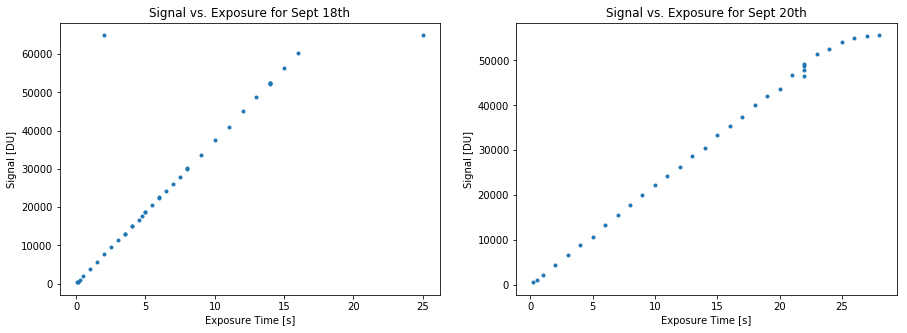

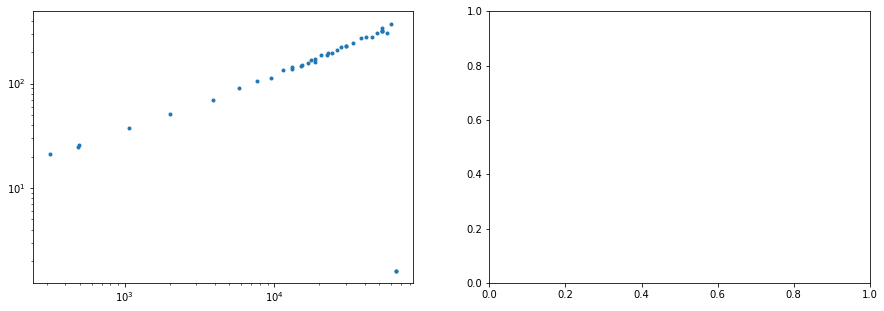

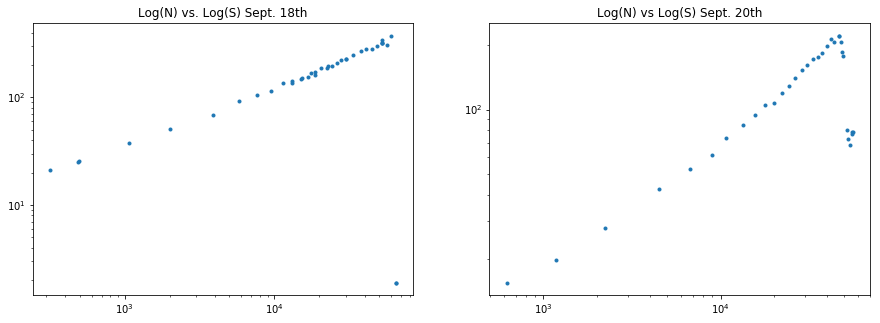

In [415]:
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].loglog(mean_18, noise_18, '.')
axarr[0].set_title('Log(N) vs. Log(S) Sept. 18th')
axarr[1].loglog(mean_20, noise_20, '.')
axarr[1].set_title('Log(N) vs Log(S) Sept. 20th')

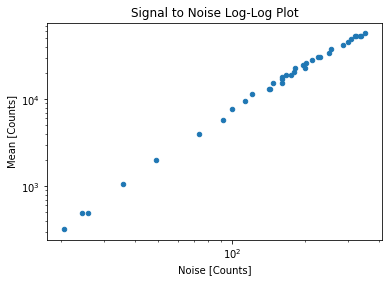

In [334]:
df_t.plot.scatter('Noise [Counts]', 'Mean [Counts]', logy=True, logx=True, title='Signal to Noise Log-Log Plot')

[  5.42859636e-03   5.46132876e+01]


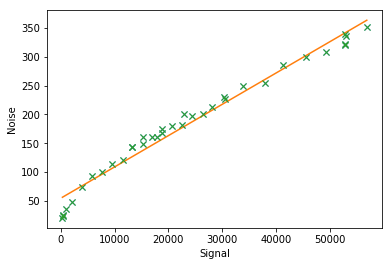

In [325]:
df_linear = df_t.loc[(df_t['Mean [Counts]']<60000.)]
df_nlinear = df_t#.loc[(df_t['Mean [Counts]']<2000.)]

signal_linear = (df_linear["Mean [Counts]"].values)
noise_linear = (df_linear["Noise [Counts]"].values)

p = np.polyfit(signal_linear, noise_linear, 1)
x = np.linspace(np.min(signal_linear), np.max(signal_linear), len(signal_linear))

plt.plot(signal_linear, noise_linear, 'x')
plt.xlabel('Signal')
plt.ylabel('Noise')
plt.plot(x, p[0]*x+p[1])

signal_nlinear = (df_nlinear["Mean [Counts]"].values)
noise_nlinear = (df_nlinear["Noise [Counts]"].values)

plt.plot(signal_nlinear,noise_nlinear, 'x')

print p

0.263092613898


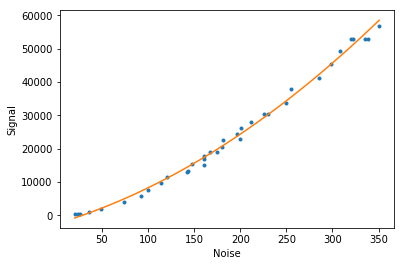

In [277]:
signal = (df_t["Mean [Counts]"].values)
noise = (df_t["Noise [Counts]"].values)
p_gain = np.polyfit(noise, signal, 2)
x = np.linspace(np.min(noise), np.max(noise), len(noise))
plt.plot(noise, signal, '.')
plt.xlabel('Noise')
plt.ylabel('Signal')
plt.plot(x, p_gain[0]*x**2+p_gain[1]*x+p_gain[2])
#plt.plot(x, p[0]*x**2+p[1]*x+p[2])
print p_gain[0]

In [286]:
print "Readout noise in photons:", p_gain[0]*p[1]
print "Readout noise in DU:", p[1]

Readout noise in photons: 21.0502885486
Readout noise in DU: 80.0109445748


Standard deviation in two bias frames subtracted: 1.87508740515
Standard deviation in two bias frames subtracted: 4.06716023582
2.87591658292


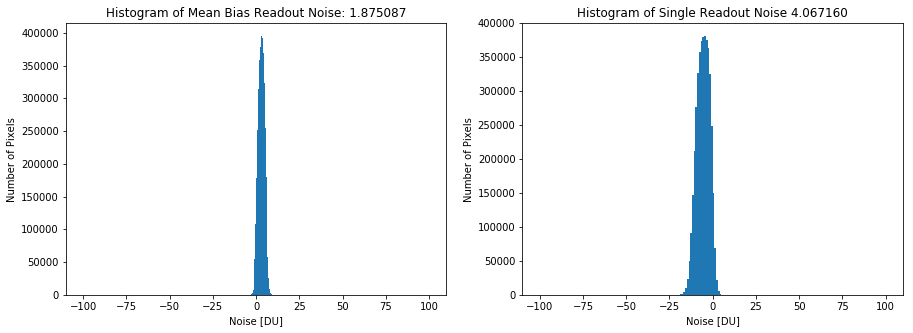

In [517]:
image_file = '/home/user/real_readout_noise.fits'
image_data = fits.getdata(image_file) # use whole image

bias_20 = []
full_master_bias_20 =[]
for image in images_20_bias:
    hdu_list = fits.open(image)
    bias_20.append(hdu_list[0].data) # try a few regions and sizes and find lowest sigma!!!

sub_full_master_bias_20 = np.mean(bias_20, axis=0)-fits.getdata(images_20_bias[3])
sub_full_bias_20 = fits.getdata(images_20_bias[3])-fits.getdata(images_20_bias[2])

NBINS_1 = 400

f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].hist(sub_full_master_bias_20.flatten(), NBINS_1, range=[-100,100])
axarr[0].set_title('Histogram of Mean Bias Readout Noise: %f'%(np.std(sub_full_master_bias_20)))
axarr[0].set_xlabel('Noise [DU]')
axarr[0].set_ylabel('Number of Pixels')

NBINS_2 = 200

axarr[1].hist(sub_full_bias_20.flatten(), NBINS_2, range=[-100,100])
axarr[1].set_title('Histogram of Single Readout Noise %f'%(np.std(sub_full_bias_20)))
axarr[1].set_xlabel('Noise [DU]')
axarr[1].set_ylabel('Number of Pixels')

print "Standard deviation in two bias frames subtracted:", np.std(sub_full_master_bias_20)#.flatten())
print "Standard deviation in two bias frames subtracted:", np.std(sub_full_bias_20)#.flatten())

print np.std(sub_full_bias_20)/np.sqrt(2)
# Total noise contains RO noise from flat fields
# Divide by root 2 to redout noise of single readout
# The method is for single readout.

In [635]:
flats_exp_20=[]
for image in images_20_flat:
    hdu_list = fits.open(image)
    prihdr = hdu_list[0].header
    if prihdr['EXPOSURE']==22.0:
        flats_exp_20.append(hdu_list[0].data[800:820,950:970])# try a few regions and sizes and find lowest sigma!!!
        
    flats_exp_20_mean = np.mean(flat_high_exp_20, axis=0)
    flatted = np.divide((hdu_list[0].data[800:820,950:970]-master_bias_20), flats_exp_20_mean).flatten()
    
print len(flatted), len(exposure_20)
df_20_flat_norm = pd.DataFrame({"exposure_20":exposure_20,"mean_20":flatted,"noise_20":noise_20})
plt.plot(flatted, noise_20, '.')
plt.show()

4
400 33


ValueError: arrays must all be same length